In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression, LogisticRegressionCV, LinearRegression,\
    ElasticNet, ElasticNetCV, MultiTaskElasticNet, MultiTaskElasticNetCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from nnpiv.rkhs import ApproxRKHSIVCV, RKHSIVCV
from sklearn.pipeline import Pipeline

from pathlib import Path
import numpy as np
#from mliv.neuralnet.deepiv_fit import deep_iv_fit
from nnpiv.tsls import tsls, regtsls
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from nnpiv.semiparametrics import DML_longterm
from nnpiv.semiparametrics import DML_npiv

In [3]:

# Read the CSV file into a DataFrame
df = pd.read_csv('../data/data_star.csv', header=0)


In [4]:

#Generate variable of ones
df['ones'] = 1

# Bind covariates
X = df[["age"]].values
G = df[["G"]].values
D = df[["D"]].values
S = df[["z_score3"]].values
Y = df[["z_score8"]].values
V = df[["age"]].values

ones = df[["ones"]].values


In [5]:
# Create an empty DataFrame to store results
results_table = pd.DataFrame(columns=['Y_value', 'Coefficient Surrogacy', 'Variance Surrogacy','Coefficient Latent', 'Variance Latent', 
                                      'Coefficient Oracle', 'Variance Oracle'])
results_list = []

# List of different Y values to loop through
outcome_lst = [f"z_score{g}" for g in range(3, 9)]
outcome_lst

['z_score3', 'z_score4', 'z_score5', 'z_score6', 'z_score7', 'z_score8']

In [6]:


for Y_value in outcome_lst:
    # Compute DML using different Y values
    Y = df[[Y_value]].values

    dml_lt = DML_longterm(Y, D, S, G,
                        longterm_model='latent_unconfounded',
                        model1 = tsls(),
                        model2 = tsls(),
                n_folds=5, n_rep=2, CHIM = False, prop_score=LogisticRegression(max_iter=2000))
    
    # Fit the model and compute coefficient and variance
    coefficient_latent, variance_latent,_ = dml_lt.dml()
 
    dml_lt = DML_longterm(Y, D, S, G,
                        longterm_model='surrogacy',
                        model1 = tsls(),
                        model2 = tsls(),
                n_folds=5, n_rep=2, CHIM = False, prop_score=LogisticRegression(max_iter=2000))
    coefficient_surr, variance_surr,_ = dml_lt.dml()

    ind = np.where(G == 0)[0]
    Y1 = Y[ind]
    D1 = D[ind]
    ones1 = ones[ind]

    dml_npiv = DML_npiv(Y1, D1, ones1, ones1,
                            estimator='MR',
                            model1 = tsls(),
                            modelq1= tsls(),
                    n_folds=10, n_rep=2, CHIM = False, prop_score=LogisticRegression(max_iter=2000))

    coefficient_oracle, variance_oracle, _ = dml_npiv.dml()

    result_df = pd.DataFrame({'Y_value': [Y_value],
                              'Coefficient Latent': [coefficient_latent],
                              'Variance Latent': [variance_latent],
                              'Coefficient Surrogacy': [coefficient_surr],
                              'Variance Surrogacy': [variance_surr],
                              'Coefficient Oracle': [coefficient_oracle],
                              'Variance Oracle': [variance_oracle]})
    
    # Append the DataFrame to the list
    results_list.append(result_df)

# Concatenate all DataFrames in the list into a single DataFrame
results_table = pd.concat(results_list, ignore_index=True)

# Display or save the results table
print(results_table)


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 17.75it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 31.10it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 28.45it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 34.89it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 66.70it/s]


Rep: 2


100%|██████████| 10/10 [00:00<00:00, 60.56it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 27.86it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 30.82it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 32.07it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 29.71it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 67.34it/s]


Rep: 2


100%|██████████| 10/10 [00:00<00:00, 67.19it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 34.25it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 28.49it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 30.31it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 35.35it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 71.12it/s]


Rep: 2


100%|██████████| 10/10 [00:00<00:00, 66.90it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 31.62it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 32.76it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 39.94it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 34.59it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 67.17it/s]


Rep: 2


100%|██████████| 10/10 [00:00<00:00, 66.43it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 33.30it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 34.41it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 35.14it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 33.37it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 74.45it/s]


Rep: 2


100%|██████████| 10/10 [00:00<00:00, 66.92it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 32.55it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 33.57it/s]


Rep: 1


100%|██████████| 5/5 [00:00<00:00, 37.15it/s]


Rep: 2


100%|██████████| 5/5 [00:00<00:00, 33.24it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 72.84it/s]


Rep: 2


100%|██████████| 10/10 [00:00<00:00, 67.03it/s]

    Y_value  Coefficient Latent  Variance Latent  Coefficient Surrogacy  \
0  z_score3            0.199593        15.943917               0.199593   
1  z_score4            0.113696        10.949494               0.146189   
2  z_score5            0.124335         9.639560               0.133247   
3  z_score6            0.118818         9.140539               0.123363   
4  z_score7            0.079391         8.583207               0.118425   
5  z_score8            0.074785         8.044311               0.109896   

   Variance Surrogacy  Coefficient Oracle  Variance Oracle  
0           15.943917            0.198788         4.793154  
1            8.307349            0.107861         4.882616  
2            6.881830            0.093215         4.903875  
3            5.954231            0.103113         4.824513  
4            5.312434            0.093466         4.836055  
5            4.550621            0.083507         4.794609  


In [7]:
results_table.to_csv('longterm_star.csv', index=False) 

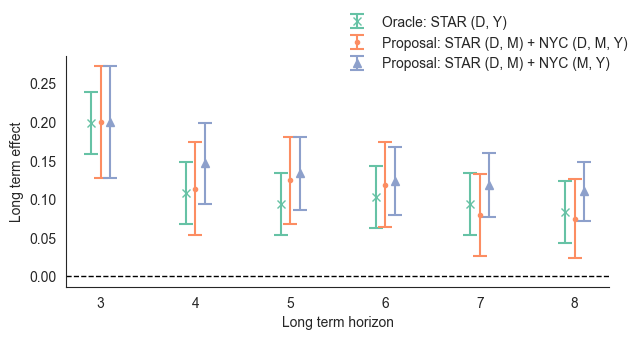

In [8]:


plt.figure(figsize=(7, 3))
sns.set_style("white")
sns.set_palette("Set2")
n = G.shape[0]

plt.errorbar(
    np.array(range(3, 9)) -0.1,
    results_table['Coefficient Oracle'],
    yerr=1.96 * np.sqrt(results_table['Variance Oracle']) * np.sqrt(1 / n) ,
    capthick=1.5,
    capsize=5,
    fmt='x',
    label="Oracle: STAR (D, Y)",
)
plt.errorbar(
    np.array(range(3, 9)) ,
    results_table['Coefficient Latent'],
    yerr=1.96 * np.sqrt(results_table['Variance Latent']) * np.sqrt(1 / n) ,
    capthick=1.5,
    capsize=5,
    fmt='.',
    label="Proposal: STAR (D, M) + NYC (D, M, Y)",
)
plt.errorbar(
    np.array(range(3, 9)) + 0.1,
    results_table['Coefficient Surrogacy'],
    yerr=1.96 * np.sqrt(results_table['Variance Surrogacy']) * np.sqrt(1 / n) ,
    capthick=1.5,
    capsize=5,
    fmt='^',
    label="Proposal: STAR (D, M) + NYC (M, Y)",
)



plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adjust line properties as needed

sns.despine()

plt.ylabel(f"Long term effect")
plt.xlabel("Long term horizon")
plt.legend(frameon=False, loc=(.5, .91))
plt.savefig('plot_longterm_star.png', dpi=600, bbox_inches='tight')  # Adjust options as needed


In [5]:
df = pd.read_csv('../data/data_star.csv', header=0)

# Bind covariates
Xnan = df[["z_score_prior"]].values
X = df[["z_score_prior"]].values
G = df[["G"]].values
D = df[["D"]].values
S = df[["z_score3"]].values
V = df[["z_score_prior"]].values
Y = df[["z_score8"]].values


#drop NaNs
X = X[~np.isnan(Xnan)].reshape(-1,1)
G = G[~np.isnan(Xnan)].reshape(-1,1)
D = D[~np.isnan(Xnan)].reshape(-1,1)
S = S[~np.isnan(Xnan)].reshape(-1,1)
Y = Y[~np.isnan(Xnan)].reshape(-1,1)
V = V[~np.isnan(Xnan)].reshape(-1,1)

ones = np.ones((X.shape[0], 1))
 

In [6]:
m1 = ApproxRKHSIVCV(kernel_approx='nystrom', n_components=200,
                                   kernel='rbf', gamma=.1, delta_scale='auto',
                                   delta_exp=.4, alpha_scales=np.geomspace(1, 10000, 10), cv=10)

m2 = ApproxRKHSIVCV(kernel_approx='nystrom', n_components=200,
                                   kernel='rbf', gamma=.1, delta_scale='auto',
                                   delta_exp=.4, alpha_scales=np.geomspace(1, 10000, 10), cv=10)

m1 = tsls()
m2 = tsls()

In [7]:
# Create an empty DataFrame to store results
results_table = pd.DataFrame(columns=['Y_value', 'Coefficient Surrogacy', 'Variance Surrogacy','Coefficient Latent', 'Variance Latent', 
                                      'Coefficient Oracle', 'Variance Oracle'])
results_list = []

# List of different Y values to loop through
outcome_lst = [f"z_score{g}" for g in range(3, 9)]


for Y_value in outcome_lst:
    # Compute DML using different Y values
    Y = df[[Y_value]].values
    Y = Y[~np.isnan(Xnan)].reshape(-1,1)
    
    dml_lt = DML_longterm(Y, D, S, G, 
                        longterm_model='latent_unconfounded',
                        model1 = m1,
                        model2 = m2,
                n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})
    
    # Fit the model and compute coefficient and variance
    coefficient_latent, variance_latent,_ = dml_lt.dml()
 
    dml_lt = DML_longterm(Y, D, S, G, 
                        longterm_model='surrogacy',
                        model1 = m1,
                        model2 = m2,
                n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})
    coefficient_surr, variance_surr,_ = dml_lt.dml()

    ind = np.where(G == 0)[0]
    Y1 = Y[ind]
    D1 = D[ind]
    X11 = X[ind]
    ones1 = ones[ind]

    dml_npiv = DML_npiv(Y1, D1, ones1, ones1,
                            estimator='MR',
                            model1 = m1,
                            modelq1= m2,
                    n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})

    coefficient_oracle, variance_oracle, _ = dml_npiv.dml()

    result_df = pd.DataFrame({'Y_value': [Y_value],
                              'Coefficient Latent': [coefficient_latent],
                              'Variance Latent': [variance_latent],
                              'Coefficient Surrogacy': [coefficient_surr],
                              'Variance Surrogacy': [variance_surr],
                              'Coefficient Oracle': [coefficient_oracle],
                              'Variance Oracle': [variance_oracle]})
    
    # Append the DataFrame to the list
    results_list.append(result_df)

# Concatenate all DataFrames in the list into a single DataFrame
results_table = pd.concat(results_list, ignore_index=True)
results_table.to_csv('longterm_star_cate_sample.csv', index=False) 



Rep: 1


100%|██████████| 10/10 [00:00<00:00, 25.39it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 29.19it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 48.49it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 22.68it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 30.47it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 53.98it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 24.49it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 27.29it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 51.79it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 24.95it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 28.64it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 55.94it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 26.47it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 28.76it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 54.81it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 34.10it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 36.39it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 67.84it/s]


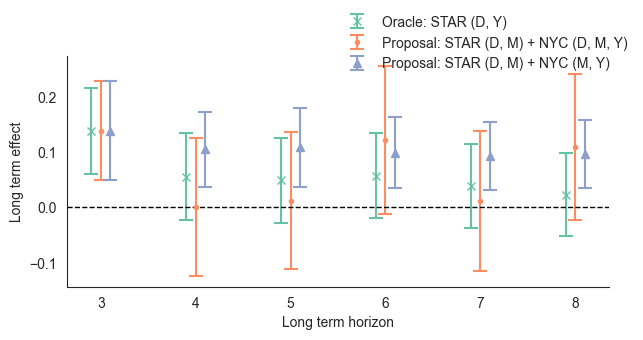

In [8]:

plt.figure(figsize=(7, 3))
sns.set_style("white")
sns.set_palette("Set2")
n = G.shape[0]

plt.errorbar(
    np.array(range(3, 9)) -0.1,
    results_table['Coefficient Oracle'],
    yerr=1.96 * np.sqrt(results_table['Variance Oracle']) * np.sqrt(1 / n) ,
    capthick=1.5,
    capsize=5,
    fmt='x',
    label="Oracle: STAR (D, Y)",
)
plt.errorbar(
    np.array(range(3, 9)) ,
    results_table['Coefficient Latent'],
    yerr=1.96 * np.sqrt(results_table['Variance Latent']) * np.sqrt(1 / n) ,
    capthick=1.5,
    capsize=5,
    fmt='.',
    label="Proposal: STAR (D, M) + NYC (D, M, Y)",
)
plt.errorbar(
    np.array(range(3, 9)) + 0.1,
    results_table['Coefficient Surrogacy'],
    yerr=1.96 * np.sqrt(results_table['Variance Surrogacy']) * np.sqrt(1 / n) ,
    capthick=1.5,
    capsize=5,
    fmt='^',
    label="Proposal: STAR (D, M) + NYC (M, Y)",
)



plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adjust line properties as needed

sns.despine()

plt.ylabel(f"Long term effect")
plt.xlabel("Long term horizon")
plt.legend(frameon=False, loc=(.5, .91))
plt.savefig('plot_longterm_star_cate_sample.png', dpi=600, bbox_inches='tight')  # Adjust options as needed


In [65]:
# Create an empty DataFrame to store results
results_table = pd.DataFrame(columns=['Y_value', 'Coefficient Surrogacy', 'Variance Surrogacy','Coefficient Latent', 'Variance Latent', 
                                      'Coefficient Oracle', 'Variance Oracle'])
results_list = []

# List of different Y values to loop through
outcome_lst = [f"z_score{g}" for g in range(3, 9)]


for Y_value in outcome_lst:
    # Compute DML using different Y values
    Y = df[[Y_value]].values
    Y = Y[~np.isnan(Xnan)].reshape(-1,1)
    
    dml_lt = DML_longterm(Y, D, S, G, X1=X,
                        estimator='MR',
                        longterm_model='latent_unconfounded',
                        model1 = m1,
                        model2 = m2,
                n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})
    
    # Fit the model and compute coefficient and variance
    coefficient_latent, variance_latent,_ = dml_lt.dml()
 
    dml_lt = DML_longterm(Y, D, S, G, X1=X,
                        estimator='MR',
                        longterm_model='surrogacy',
                        model1 = m1,
                        model2 = m2,
                n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})
    coefficient_surr, variance_surr,_ = dml_lt.dml()

    ind = np.where(G == 0)[0]
    Y1 = Y[ind]
    D1 = D[ind]
    X11 = X[ind]
    ones1 = ones[ind]

    dml_npiv = DML_npiv(Y1, D1, ones1, ones1, X1=X11,
                            estimator='MR',
                            model1 = m1,
                            modelq1= m2,
                    n_folds=10, n_rep=1, CHIM = False, prop_score=LogisticRegression(max_iter=2000), opts = {'lin_degree': 1})

    coefficient_oracle, variance_oracle, _ = dml_npiv.dml()

    result_df = pd.DataFrame({'Y_value': [Y_value],
                              'Coefficient Latent': [coefficient_latent],
                              'Variance Latent': [variance_latent],
                              'Coefficient Surrogacy': [coefficient_surr],
                              'Variance Surrogacy': [variance_surr],
                              'Coefficient Oracle': [coefficient_oracle],
                              'Variance Oracle': [variance_oracle]})
    
    # Append the DataFrame to the list
    results_list.append(result_df)

# Concatenate all DataFrames in the list into a single DataFrame
results_table = pd.concat(results_list, ignore_index=True)
results_table.to_csv('longterm_star_cate_sample_covs.csv', index=False) 



Rep: 1


100%|██████████| 10/10 [00:00<00:00, 46.81it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 65.64it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 70.79it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 55.64it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 63.87it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 69.96it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 63.45it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 62.61it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 69.12it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 52.50it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 65.33it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 58.23it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 57.83it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 68.64it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 76.50it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 59.11it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 59.43it/s]


Rep: 1


100%|██████████| 10/10 [00:00<00:00, 75.12it/s]


In [66]:
results_table

,Y_value,Coefficient Latent,Variance Latent,Coefficient Surrogacy,Variance Surrogacy,Coefficient Oracle,Variance Oracle
0,z_score3,0.016228,4.394460,0.016228,4.394460,0.034354,6.812412
1,z_score4,-0.063814,8.823527,0.008960,1.303019,-0.049882,6.994154
2,z_score5,-0.055249,8.472227,0.009028,1.514918,-0.052383,7.855707
3,z_score6,0.076142,12.828336,0.010435,1.188352,-0.029664,8.399744
4,z_score7,-0.012824,10.778848,0.007265,1.080606,-0.077353,5.335176
5,z_score8,0.068108,11.036004,0.009074,0.985909,-0.100075,5.637803


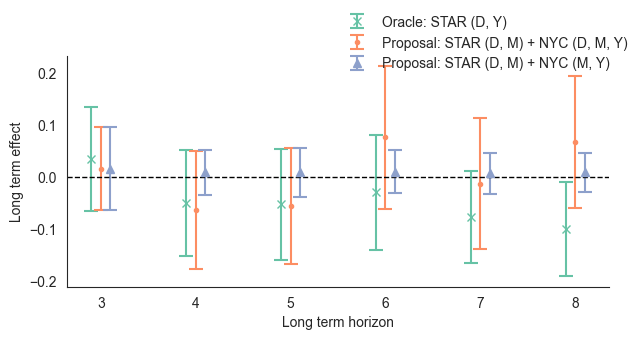

In [67]:

plt.figure(figsize=(7, 3))
sns.set_style("white")
sns.set_palette("Set2")
n = G.shape[0]

plt.errorbar(
    np.array(range(3, 9)) -0.1,
    results_table['Coefficient Oracle'],
    yerr=1.96 * np.sqrt(results_table['Variance Oracle']) * np.sqrt(1 / n) ,
    capthick=1.5,
    capsize=5,
    fmt='x',
    label="Oracle: STAR (D, Y)",
)
plt.errorbar(
    np.array(range(3, 9)) ,
    results_table['Coefficient Latent'],
    yerr=1.96 * np.sqrt(results_table['Variance Latent']) * np.sqrt(1 / n) ,
    capthick=1.5,
    capsize=5,
    fmt='.',
    label="Proposal: STAR (D, M) + NYC (D, M, Y)",
)
plt.errorbar(
    np.array(range(3, 9)) + 0.1,
    results_table['Coefficient Surrogacy'],
    yerr=1.96 * np.sqrt(results_table['Variance Surrogacy']) * np.sqrt(1 / n) ,
    capthick=1.5,
    capsize=5,
    fmt='^',
    label="Proposal: STAR (D, M) + NYC (M, Y)",
)



plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adjust line properties as needed

sns.despine()

plt.ylabel(f"Long term effect")
plt.xlabel("Long term horizon")
plt.legend(frameon=False, loc=(.5, .91))
plt.savefig('plot_longterm_star_cate_sample_covs.png', dpi=600, bbox_inches='tight')  # Adjust options as needed
